<a href="https://colab.research.google.com/github/petermesy/scrap/blob/main/crapify_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🕸️ Scrapify

<!-- [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YonaniCodes/Scrapify/blob/main/notebooks/scrapify-demo.ipynb) -->


In [3]:
import sys
import os

# Verify we're running in Colab - exit if not
try:
    import google.colab
except ImportError:
    raise RuntimeError("This script is designed to run only in Google Colab")

# Define repo details
repo_url = "https://github.com/YonaniCodes/Scrapify.git"
repo_path = "/content/Scrapify"

# Clone or update the repository
if not os.path.exists(repo_path):
    !git clone {repo_url} {repo_path}
else:
    %cd {repo_path}
    !git stash  # Stash any local changes
    !git pull

# Add src/ to Python path
sys.path.append(f"{repo_path}/src")

# Import the scraper function (replace with actual import)
# from scraper_module import scrape_function
!pip install -r requirements.txt
!pip install PyMuPDF


/content/Scrapify
No local changes to save
Already up to date.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.5 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement pywin32==306 (from versions: none)
ERROR: No matching distribution found for pywin32==306


In [4]:
import subprocess

# Get output of ls command
output = subprocess.check_output("ls", shell=True).decode().splitlines()

# Now you can conditionally check
if "scraped_data.csv" in output:
    print("Everything is ready you can start working 🎉🎉🎉🎉")
else:
    print("scraped_data.csv not found.😒😒😒 please ask Yonani for the file")

Everything is ready you can start working 🎉🎉🎉🎉


In [5]:
import sys
sys.path.append('/content/Scrapify/src')

In [6]:
from scrapify import scrape
from scrapify import get_report
from preprocessing import normalize_amharic

import pandas as pd

## Steps to Scrape a website

1. Install the  `googlesearch-python` module
2. Define a function that takes two arguments `num_urls` and `search_query`. and return list of urls
3. call the `scrape` method by passing list of `urls` and `your_name` as a second paramete (optional).

In [7]:
!pip install googlesearch-python

In [8]:
from googlesearch import search

def get_links_from_simple_search(query, num_results):
    """
    Retrieves URLs from a simple Google search.

    Args:
        query (str): The search query.
        num_results (int): The desired number of search results. This is not directly supported by googlesearch,
                          so it will be used to limit the results after fetching.

    Returns:
        list: A list of URLs.
    """
    # Fetch the search results
    search_results = search(query, num_results=num_results)
    # Convert the generator object to a list
    urls = list(set(search_results))
    return urls

We need a function to filter if the url is already scraped we dont wanna send reques to our backend everyurl that is returned by the function `get_links_from_simple_search`

In [9]:
def filter_url(urls):
# Assuming scraped_data and unscraped_data are pandas DataFrames with a 'url' column
  scraped,unscrape=get_report()
  scraped_data= pd.DataFrame(scraped)
  unscraped_data= pd.DataFrame(unscrape)
  filtered_urls = []
  for url in urls:
      # Check if the URL is NOT in both scraped_data.url and unscraped_data.url
      if url not in scraped_data['url'].values and url not in unscraped_data['url'].values:
          filtered_urls.append(url)
  return filtered_urls

# **Lets visualize our scraping status**

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_scraping_report():
    """
    Generate a pie chart showing the ratio of scraped to unscraped URLs.
    Uses get_report() internally to fetch the data.
    """
    # Get the data
    scraped, unscraped = get_report()

    # Convert to DataFrames
    scraped_data = pd.DataFrame(scraped)
    unscraped_data = pd.DataFrame(unscraped)

    # Calculate counts
    scraped_count = len(scraped_data['url'])
    unscraped_count = len(unscraped_data['url'])

    # Prepare data for visualization
    labels = ['Scraped URLs', 'Unscraped URLs']
    sizes = [scraped_count, unscraped_count]
    colors = ['salmon', 'lightblue']  # Green and red

    # Create the figure
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(sizes,
           labels=labels,
           colors=colors,
           autopct=lambda p: f'{p:.1f}%\n({int(p/100*sum(sizes))})',
           startangle=90,
           wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
           textprops={'fontsize': 12})

    ax.set_title('Scraping Report: Scraped vs Unscraped URLs', pad=20, fontsize=14)
    plt.tight_layout()




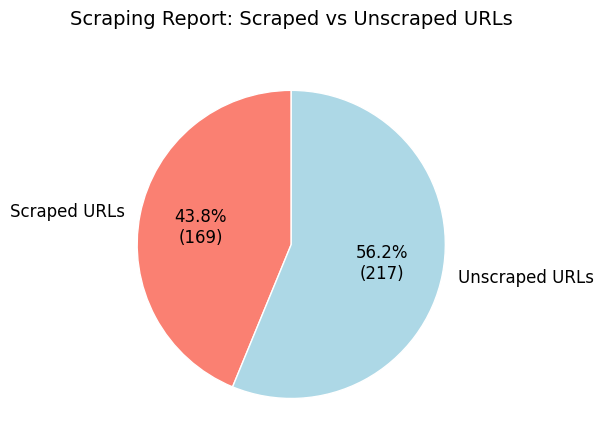

In [11]:
# Example usage:
plot_scraping_report()

### Normalizing our data


In order to normalize our well define
1. deffine a function `read_jsonl_content` to read jsoln file
2. normalize the text returned using `normalize_and_save_data`
3. Finall define the wraper function `normalize_jsonl_file`



In [12]:
import json

def read_jsonl_content(file_path, content_key='content'):
    """Returns a list of 'content' values from a .jsonl file."""
    content_values = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            stripped_line = line.strip()
            if stripped_line:
                record = json.loads(stripped_line)
                content_values.append(record[content_key])

    print(f"Read {len(content_values)} records from {file_path}.")
    return content_values  # Example: ["text1", "text2", ...]

In [13]:
def normalize_and_save_data(jsonl_data, file_path):
    """Writes all JSONL entries as one continuous text blob."""
    with open(file_path, 'w', encoding='utf-8') as f:
        all_text = " ".join(normalize_amharic(text) for text in jsonl_data)  # No newlines
        f.write(all_text)

In [14]:
def normalize_jsonl_file(input_file, output_file):
  jsonl_data=read_jsonl_content(test_file_path)
  normalize_and_save_data(jsonl_data, destination_file_path)

How to normalize data?

1. define `test_file_path` the jsonl file is found.
2. define `destination` you want to store the normaliez text file
3. call the function `normalize_and_save_data  ` with the two parameters
4. finnally call the wraper function

In [16]:
test_file_path = '/content/Scrapify/extracted_data11.jsonl'
destination_file_path = '/content/Scrapify/normalized1.txt'

normalize_jsonl_file(test_file_path, destination_file_path)


Read 169 records from /content/Scrapify/extracted_data11.jsonl.


### Chunking the data. now is the time to chunk all the data.

In [ ]:
import os
import os
import shutil
from google.colab import files

def read_normalized_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()


def save_chunks_as_files(chunks, output_dir, base_filename="chunk"):
    os.makedirs(output_dir, exist_ok=True)
    saved_files = []
    for i, chunk in enumerate(chunks, 1):
        filename = f"{base_filename}_{i}.txt"
        file_path = os.path.join(output_dir, filename)
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(chunk)
        saved_files.append(file_path)

    # Print first 10 saved files for confirmation
    for file_path in saved_files[:10]:
        print(f"Saved: {file_path}")

    return saved_files

def zip_chunks_folder(folder_path):
    zip_path = shutil.make_archive(folder_path, 'zip', folder_path)
    print(f"Created ZIP archive: {zip_path}")
    return zip_path


In [ ]:
import datetime
normalized_file_path = '/content/Scrapify/normalized1.txt'
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
destination_file_path = f'/content/Scrapify/chunks1*{timestamp}'
text=read_normalized_text(normalized_file_path)
chunks=chunk_text(text)
save_chunks_as_files(chunks,destination_file_path)





Saved: /content/Scrapify/chunks1*20250423_074056/chunk_1.txt
Saved: /content/Scrapify/chunks1*20250423_074056/chunk_2.txt
Saved: /content/Scrapify/chunks1*20250423_074056/chunk_3.txt
Saved: /content/Scrapify/chunks1*20250423_074056/chunk_4.txt
Saved: /content/Scrapify/chunks1*20250423_074056/chunk_5.txt
Saved: /content/Scrapify/chunks1*20250423_074056/chunk_6.txt
Saved: /content/Scrapify/chunks1*20250423_074056/chunk_7.txt
Saved: /content/Scrapify/chunks1*20250423_074056/chunk_8.txt
Saved: /content/Scrapify/chunks1*20250423_074056/chunk_9.txt
Saved: /content/Scrapify/chunks1*20250423_074056/chunk_10.txt


['/content/Scrapify/chunks1*20250423_074056/chunk_1.txt',
 '/content/Scrapify/chunks1*20250423_074056/chunk_2.txt',
 '/content/Scrapify/chunks1*20250423_074056/chunk_3.txt',
 '/content/Scrapify/chunks1*20250423_074056/chunk_4.txt',
 '/content/Scrapify/chunks1*20250423_074056/chunk_5.txt',
 '/content/Scrapify/chunks1*20250423_074056/chunk_6.txt',
 '/content/Scrapify/chunks1*20250423_074056/chunk_7.txt',
 '/content/Scrapify/chunks1*20250423_074056/chunk_8.txt',
 '/content/Scrapify/chunks1*20250423_074056/chunk_9.txt',
 '/content/Scrapify/chunks1*20250423_074056/chunk_10.txt',
 '/content/Scrapify/chunks1*20250423_074056/chunk_11.txt',
 '/content/Scrapify/chunks1*20250423_074056/chunk_12.txt',
 '/content/Scrapify/chunks1*20250423_074056/chunk_13.txt',
 '/content/Scrapify/chunks1*20250423_074056/chunk_14.txt',
 '/content/Scrapify/chunks1*20250423_074056/chunk_15.txt',
 '/content/Scrapify/chunks1*20250423_074056/chunk_16.txt',
 '/content/Scrapify/chunks1*20250423_074056/chunk_17.txt',
 '/con

## Downloading the chunks

In [ ]:
zip_file_path = zip_chunks_folder(destination_file_path)
files.download(zip_file_path)

print(f"Chunks folder zipped and ready for download: {zip_file_path}")


Created ZIP archive: /content/Scrapify/chunks1*20250423_074056.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Chunks folder zipped and ready for download: /content/Scrapify/chunks1*20250423_074056.zip
